# Data Cleaning and Data Analysis

In [1]:
import pandas as pd

#load the dataset
dataset = pd.read_csv('heart.csv')

In [2]:
dataset.head() #view first 5 rows of data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [3]:
# see data row and column
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
dataset.shape

(918, 12)

In [4]:
# see data types of each column
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [5]:
#statistical summary
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,916.000000,915.000000,917.000000,918.000000,903.000000
mean,53.510893,132.396514,198.852620,0.232787,136.767721,0.887364,0.555925
std,9.432617,18.514154,109.193372,0.422839,25.442922,1.066570,0.497138
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
# any null-values?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     916 non-null    float64
 5   FastingBS       915 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           917 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    903 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [7]:
# drop null values row
dataset.dropna(inplace=True)

#not dropping any columns since all are related data
# and show again the shape of dataset
dataset.shape

(897, 12)

In [8]:
# https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d
# begin with checking unique values in each columns to ensure values are correct and clean

# Age: age of the patient [years]
dataset['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [9]:
# Sex: sex of the patient [M: Male, F: Female]
dataset['Sex'].unique()

array(['M', 'F'], dtype=object)

In [10]:
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
dataset['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [11]:
# RestingBP: resting blood pressure [mm Hg]
dataset['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
       200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152, 116,
         0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int64)

In [12]:
# Cholesterol: serum cholesterol [mm/dl]
dataset['Cholesterol'].unique()

array([289., 180., 283., 214., 195., 339., 237., 208., 207., 284., 211.,
       164., 204., 234., 273., 196., 201., 248., 267., 223., 184., 288.,
       215., 209., 260., 468., 188., 518., 167., 224., 172., 186., 254.,
       306., 250., 177., 227., 230., 294., 264., 259., 175., 318., 216.,
       340., 233., 205., 245., 194., 270., 213., 365., 342., 253., 277.,
       202., 297., 225., 246., 412., 265., 182., 218., 268., 163., 529.,
       100., 206., 238., 139., 263., 291., 229., 307., 210., 329., 147.,
        85., 269., 275., 179., 392., 466., 129., 241., 255., 276., 282.,
       338., 160., 156., 272., 240., 393., 161., 228., 292., 388., 166.,
       247., 331., 341., 243., 279., 198., 249., 168., 603., 159., 190.,
       185., 290., 212., 231., 222., 235., 320., 266., 287., 404., 312.,
       251., 328., 285., 280., 192., 193., 308., 219., 257., 132., 226.,
       217., 303., 298., 256., 295., 173., 315., 281., 309., 200., 336.,
       355., 326., 171., 491., 271., 274., 394., 22

In [13]:
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
dataset['FastingBS'].unique()

array([0., 1.])

In [14]:
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
dataset['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [15]:
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
dataset['MaxHR'].unique()

array([172., 156.,  98., 108., 122., 170., 142., 130., 120.,  99., 145.,
       140., 137., 150., 166., 165., 125., 160., 164., 138., 178., 112.,
       118., 127., 114., 154., 155.,  87., 148., 100., 168., 184., 121.,
       153., 134.,  96., 174., 175., 144.,  82., 135., 115., 128., 116.,
        94., 110.,  92., 180., 152., 124., 106., 185., 139., 190., 146.,
       158., 132., 176., 119., 188., 162., 105.,  90., 136., 167., 129.,
       102., 143., 103.,  91., 126.,  93., 131., 149., 123., 182., 141.,
        77., 109., 133., 179., 113., 104.,  95.,  97., 117.,  86.,  63.,
       157.,  83.,  60.,  70., 163.,  67.,  72.,  78.,  84., 111.,  80.,
       107., 161.,  69.,  88.,  73., 159., 151., 181., 186., 177., 173.,
       169., 171., 147.,  71., 192., 195., 194., 187., 202.])

In [16]:
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
dataset['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [17]:
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
dataset['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.3,  0.3,  1.8,  2.6,
       -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1, -0.7,
       -0.8,  1.6,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [18]:
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
dataset['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [19]:
# HeartDisease: output class [1: heart disease, 0: Normal]
dataset['HeartDisease'].unique()

array([0., 1.])

In [20]:
# print duplicated rows https://www.w3schools.com/python/pandas/pandas_cleaning_duplicates.asp
# it will returns True for every row that is a duplicate, othwerwise False
print(dataset.duplicated())
#no duplicated rows, no need to remove any rows

0      False
1      False
2      False
3      False
4      False
       ...  
912    False
913    False
914    False
916    False
917    False
Length: 897, dtype: bool


# Correlations and Visualize

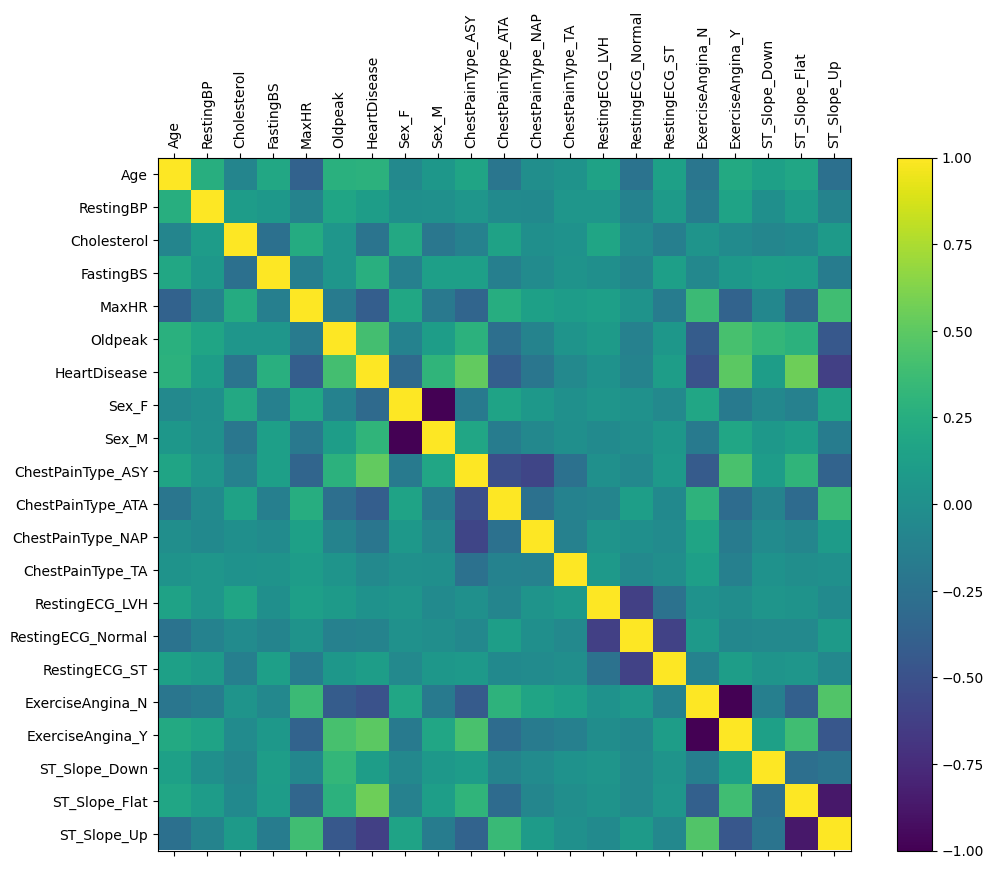

In [21]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a

# one-hot encoding for all categorical columns https://www.geeksforgeeks.org/python-pandas-get_dummies-method/
encoded_dataset = pd.get_dummies(dataset)

# compute the correlation matrix
correlations = encoded_dataset.corr()

import matplotlib.pyplot as plt 
# plot matrix as a heatmap
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

# Set label
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.columns)), correlations.columns)

plt.show()

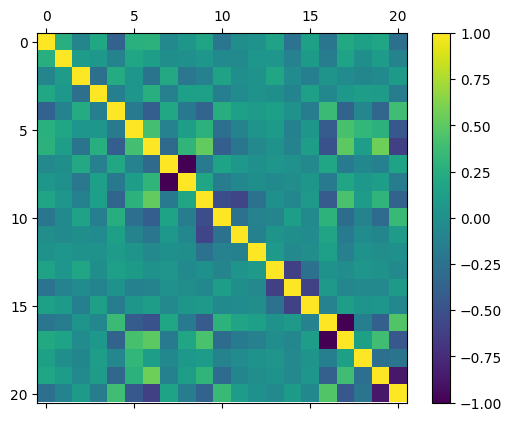

In [22]:
# without establishing label
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

# Data Visualization with Histogram

In [23]:
# https://www.linkedin.com/pulse/detailed-preprocessing-process-machine-learning-python-leonardo-a
# generate charts
%matplotlib inline

# this dataset contains both numerical and categorical features, a scatter plot may not be the most suitable visualization, histogram is the better way

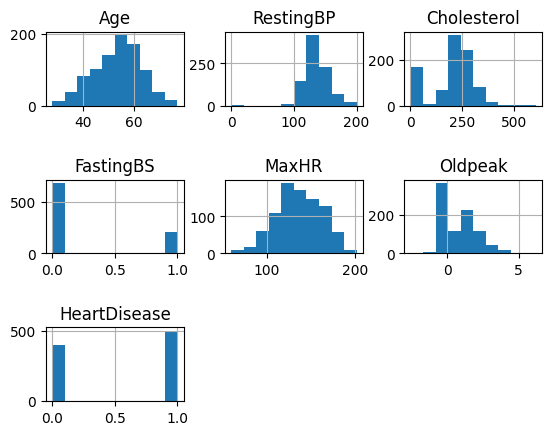

In [24]:
# show histogram of each column
dataset.hist()
plt.subplots_adjust(hspace=1.0) #dont let diagrams cross over
plt.show()

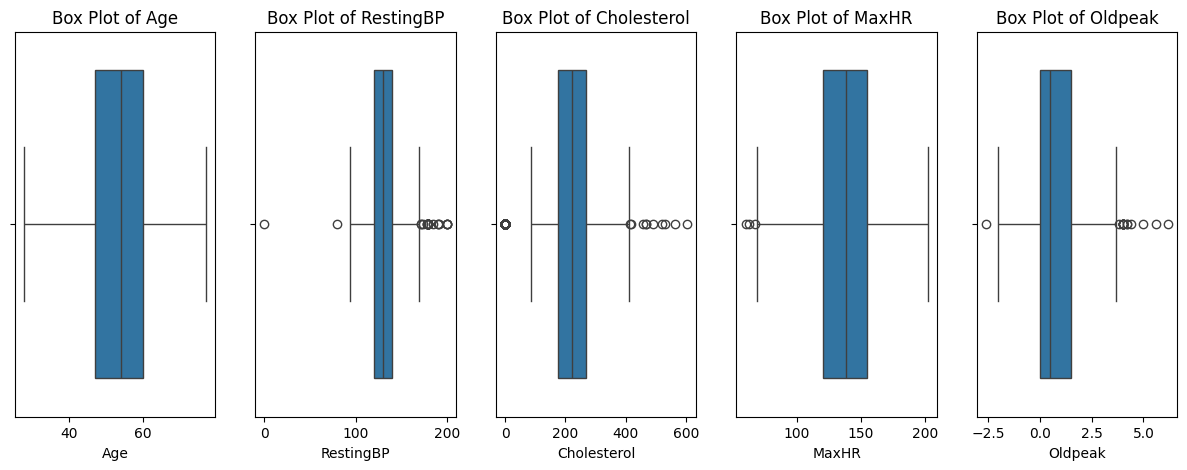

In [25]:
import seaborn as sns

# choose the numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=column, data=dataset, ax=axes[i])

# titles
for i, column in enumerate(numerical_columns):
    axes[i].set_title(f'Box Plot of {column}')

plt.show()

# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler 

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# columns that need scaling
columns_to_scale = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

# implement standardization (Z-score normalization)
scaler = StandardScaler()
encoded_dataset[columns_to_scale] = scaler.fit_transform(encoded_dataset[columns_to_scale])

# view the latest data values
print(encoded_dataset.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433892   0.408105     0.819937        0.0  1.391609 -0.828169   
1 -0.483107   1.485576    -0.175478        0.0  0.759612  0.104965   
2 -1.750820  -0.130630     0.765143        0.0 -1.531377 -0.828169   
3 -0.588750   0.300358     0.135019        0.0 -1.136379  0.571531   
4  0.045107   0.946841    -0.038494        0.0 -0.583382 -0.828169   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0           0.0  False   True              False  ...              False   
1           1.0   True  False              False  ...               True   
2           0.0  False   True              False  ...              False   
3           1.0   True  False               True  ...              False   
4           0.0  False   True              False  ...               True   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0             False           False              

In [27]:
# interaction features: combined effect of the two factors might have an impact on heart disease risk https://www.geeksforgeeks.org/data-analysis-with-python/

#patient's age and their maximum heart rate
encoded_dataset["Age_MaxHR_Interaction"] = encoded_dataset["Age"] * encoded_dataset["MaxHR"] 

# patient's age may impact the relationship between blood pressure and the likelihood of heart disease
encoded_dataset["Age_RestingBP_Interaction"] = encoded_dataset["Age"] * encoded_dataset["RestingBP"]

# cholesterol and resting blood pressure
encoded_dataset["Cholesterol_RestingBP_Interaction"] = encoded_dataset["Cholesterol"] * encoded_dataset["RestingBP"]

# cholesterol and maximum heart rate
encoded_dataset["Cholesterol_MaxHR_Interaction"] = encoded_dataset["Cholesterol"] * encoded_dataset["MaxHR"]

# view the latest data values
print(encoded_dataset.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433892   0.408105     0.819937        0.0  1.391609 -0.828169   
1 -0.483107   1.485576    -0.175478        0.0  0.759612  0.104965   
2 -1.750820  -0.130630     0.765143        0.0 -1.531377 -0.828169   
3 -0.588750   0.300358     0.135019        0.0 -1.136379  0.571531   
4  0.045107   0.946841    -0.038494        0.0 -0.583382 -0.828169   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  RestingECG_ST  \
0           0.0  False   True              False  ...          False   
1           1.0   True  False              False  ...          False   
2           0.0  False   True              False  ...           True   
3           1.0   True  False               True  ...          False   
4           0.0  False   True              False  ...          False   

   ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0              True             False          False          False   
1   

# Data Split

In [28]:
# https://realpython.com/train-test-split-python-data/#prerequisites-for-using-train_test_split
from sklearn.model_selection import train_test_split

# get x and y data
x = encoded_dataset.drop("HeartDisease", axis=1)
y = encoded_dataset["HeartDisease"]

# split data randomly with 70% train data, 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [29]:
x_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_MaxHR_Interaction,Age_RestingBP_Interaction,Cholesterol_RestingBP_Interaction,Cholesterol_MaxHR_Interaction
737,0.362036,1.054588,0.682953,0.0,-1.926376,0.291591,False,True,True,False,...,False,False,True,False,True,False,-0.697417,0.381798,0.720234,-1.315624
276,-0.271821,0.138738,-0.358122,0.0,0.522613,1.038098,False,True,False,False,...,False,True,False,False,True,False,-0.142057,-0.037712,-0.049685,-0.187159
206,-1.962106,-0.669365,0.993449,0.0,1.707607,-0.828169,False,True,False,True,...,False,True,False,False,False,True,-3.350506,1.313365,-0.664980,1.696422
747,-1.222606,0.408105,0.244606,0.0,1.628608,-0.828169,False,True,True,False,...,False,True,False,False,False,True,-1.991146,-0.498952,0.099825,0.398367
257,-1.856463,0.946841,-0.358122,0.0,1.391609,-0.828169,False,True,False,False,...,False,True,False,False,False,True,-2.583470,-1.757775,-0.339085,-0.498366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,-0.800035,-1.746836,-1.819281,1.0,-0.148884,-3.254317,False,True,True,False,...,True,True,False,False,True,False,0.119112,1.397530,3.177985,0.270862
890,1.101535,2.024311,0.253738,0.0,0.720112,-0.268289,False,True,False,False,...,False,True,False,False,True,False,0.793229,2.229850,0.513644,0.182720
647,-1.750820,-0.669365,0.144151,0.0,1.312609,-0.828169,True,False,False,False,...,False,True,False,False,False,True,-2.298143,1.171938,-0.096490,0.189214
230,-1.750820,-0.130630,1.057375,0.0,0.838611,-0.828169,False,True,True,False,...,False,True,False,False,False,True,-1.468258,0.228709,-0.138125,0.886727


In [30]:
x_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age_MaxHR_Interaction,Age_RestingBP_Interaction,Cholesterol_RestingBP_Interaction,Cholesterol_MaxHR_Interaction
217,0.045107,-0.669365,0.162415,0.0,0.009115,-0.828169,False,True,False,False,...,False,True,False,False,False,True,0.000411,-0.030193,-0.108715,0.001480
47,-0.377464,0.408105,0.153283,0.0,1.312609,-0.828169,False,True,False,True,...,False,True,False,False,False,True,-0.495463,-0.154045,0.062556,0.201201
336,1.946677,1.485576,-1.819281,0.0,-0.899380,0.664845,False,True,False,False,...,False,True,False,False,True,False,-1.750804,2.891937,-2.702680,1.636226
903,0.256393,-0.130630,0.198944,0.0,1.036111,-0.828169,False,True,False,True,...,False,True,False,False,False,True,0.265651,-0.033493,-0.025988,0.206128
232,-1.645177,-0.669365,0.692085,0.0,-0.306883,-0.828169,True,False,False,True,...,False,True,False,False,False,True,0.504877,1.101224,-0.463258,-0.212389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,1.418464,-0.669365,0.345060,0.0,-2.597872,0.104965,False,True,True,False,...,False,True,False,False,True,False,-3.684987,-0.949470,-0.230971,-0.896423
64,-0.377464,-1.208100,0.025432,0.0,0.325114,-0.828169,True,False,False,True,...,False,True,False,False,False,True,-0.122719,0.456014,-0.030724,0.008268
572,1.101535,0.946841,-0.056758,0.0,-0.069884,-0.361602,False,True,True,False,...,True,False,True,False,True,False,-0.076980,1.042978,-0.053741,0.003967
234,0.045107,0.408105,1.002582,0.0,0.127615,-0.828169,True,False,False,True,...,True,True,False,False,False,True,0.005756,0.018409,0.409159,0.127944


In [31]:
y_train

737    1.0
276    1.0
206    0.0
747    0.0
257    0.0
      ... 
324    1.0
890    0.0
647    0.0
230    0.0
900    1.0
Name: HeartDisease, Length: 627, dtype: float64

In [32]:
y_test

217    0.0
47     0.0
336    0.0
903    0.0
232    0.0
      ... 
716    1.0
64     0.0
572    1.0
234    0.0
259    0.0
Name: HeartDisease, Length: 270, dtype: float64

# Model Training

In [33]:
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# training model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logistic_model = LogisticRegression()

# fit the model to training data
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [34]:
# similar to logistic
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

# Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score

# logistic model accuracy
y_pred_logistic_model = logistic_model.predict(x_test)
logistic_model_accuracy = accuracy_score(y_test, y_pred_logistic_model)
print("Test Accuracy of logistic model: ", logistic_model_accuracy)

# decision tree accuracy
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
decision_tree_model_accuracy = accuracy_score(y_test, decision_tree_model_y_pred)
print("Test Accuracy of decision tree model: ", decision_tree_model_accuracy)

Test Accuracy of logistic model:  0.8740740740740741
Test Accuracy of decision tree model:  0.8


In [36]:
# https://proclusacademy.com/blog/practical/precision-recall-f1-score-sklearn/
from sklearn.metrics import precision_score, recall_score, f1_score

# logistic regression model
precision_logistic = precision_score(y_test, y_pred_logistic_model) #how many positive predictions made were actually correct
recall_logistic = recall_score(y_test, y_pred_logistic_model) #how many actual positive instances were correctly predicted
f1_logistic = f1_score(y_test, y_pred_logistic_model) #combine precision and recall into a balanced measure

print("Precision for logistic model: ", precision_logistic)
print("Recall for logistic model: ", recall_logistic)
print("F1-Score for logistic model: ", f1_logistic)

# decision tree model
precision_decision_tree = precision_score(y_test, decision_tree_model_y_pred)
recall_decision_tree = recall_score(y_test, decision_tree_model_y_pred)
f1_decision_tree = f1_score(y_test, decision_tree_model_y_pred)

print("\nPrecision for decision tree model: ", precision_decision_tree)
print("Recall for decision tree model: ", recall_decision_tree)
print("F1-Score for decision tree model: ", f1_decision_tree)

Precision for logistic model:  0.8733333333333333
Recall for logistic model:  0.8972602739726028
F1-Score for logistic model:  0.8851351351351352

Precision for decision tree model:  0.8108108108108109
Recall for decision tree model:  0.821917808219178
F1-Score for decision tree model:  0.8163265306122449


# Model Tuning

In [37]:
# try to remove the interacted columns

# get x and y data
columns_to_drop = ["HeartDisease", "Age_MaxHR_Interaction", "Age_RestingBP_Interaction", "Cholesterol_RestingBP_Interaction", "Cholesterol_MaxHR_Interaction"]
x = encoded_dataset.drop(columns=columns_to_drop, axis=1)
y = encoded_dataset["HeartDisease"]

# split data randomly with 70% train data, 30% test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [38]:
x_train #check current columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
255,-0.060536,-0.669365,0.682953,0.0,-0.267383,-0.828169,True,False,False,False,True,False,False,True,False,True,False,False,False,True
143,-0.060536,0.408105,0.399854,0.0,0.720112,-0.828169,False,True,True,False,False,False,False,True,False,True,False,False,False,True
114,-0.483107,-0.130630,0.071093,0.0,-0.069884,-0.828169,True,False,False,False,True,False,False,False,True,True,False,False,False,True
1,-0.483107,1.485576,-0.175478,0.0,0.759612,0.104965,True,False,False,False,True,False,False,True,False,True,False,False,True,False
398,-0.166178,1.754944,-1.819281,1.0,-0.583382,0.104965,False,True,True,False,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,-0.166178,-1.315847,0.308531,1.0,0.404113,-0.734856,False,True,True,False,False,False,False,True,False,True,False,False,False,True
286,0.573321,0.408105,-0.275932,0.0,0.127615,-0.828169,False,True,True,False,False,False,False,True,False,True,False,False,False,True
716,1.418464,-0.669365,0.345060,0.0,-2.597872,0.104965,False,True,True,False,False,False,False,True,False,True,False,False,True,False
250,-1.011321,0.138738,2.664650,0.0,-0.069884,-0.828169,False,True,True,False,False,False,False,True,False,True,False,False,True,False


In [39]:
# train model again

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [40]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
# Check accuracy to compare

# logistic model accuracy
y_pred_logistic_model = logistic_model.predict(x_test)
logistic_model_accuracy = accuracy_score(y_test, y_pred_logistic_model)
print("Test Accuracy of logistic model: ", logistic_model_accuracy)

# decision tree accuracy
decision_tree_model_y_pred = decision_tree_model.predict(x_test)
decision_tree_model_accuracy = accuracy_score(y_test, decision_tree_model_y_pred)
print("Test Accuracy of decision tree model: ", decision_tree_model_accuracy)

Test Accuracy of logistic model:  0.8629629629629629
Test Accuracy of decision tree model:  0.7925925925925926


In [42]:
# check other metrics to compare

# logistic regression model
precision_logistic = precision_score(y_test, y_pred_logistic_model) #how many positive predictions made were actually correct
recall_logistic = recall_score(y_test, y_pred_logistic_model) #how many actual positive instances were correctly predicted
f1_logistic = f1_score(y_test, y_pred_logistic_model) #combine precision and recall into a balanced measure

print("Precision for logistic model: ", precision_logistic)
print("Recall for logistic model: ", recall_logistic)
print("F1-Score for logistic model: ", f1_logistic)

# decision tree model
precision_decision_tree = precision_score(y_test, decision_tree_model_y_pred)
recall_decision_tree = recall_score(y_test, decision_tree_model_y_pred)
f1_decision_tree = f1_score(y_test, decision_tree_model_y_pred)

print("\nPrecision for decision tree model: ", precision_decision_tree)
print("Recall for decision tree model: ", recall_decision_tree)
print("F1-Score for decision tree model: ", f1_decision_tree)

Precision for logistic model:  0.8961038961038961
Recall for logistic model:  0.8679245283018868
F1-Score for logistic model:  0.8817891373801917

Precision for decision tree model:  0.8503401360544217
Recall for decision tree model:  0.7861635220125787
F1-Score for decision tree model:  0.8169934640522877


In [43]:
# comparison results shows that the models that after dropping interacted columns performed better. Thus, the interacted columns are not helping in enhancing performance

# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
# Hence, perform model tuning in each model

# Logistic Model:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Common C values
}

logistic_model = LogisticRegression()
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_ #get best
print("Best Hyperparameters:", best_params)

# train the final model with best hyperparameters
final_model_logistic = LogisticRegression(C=best_params['C']) #regularization
final_model_logistic.fit(x_train, y_train)

# evaluate
test_accuracy = final_model_logistic.score(x_test, y_test)
print("Test Accuracy of the tuned logistic model: ", test_accuracy)

Best Hyperparameters: {'C': 0.1}
Test Accuracy of the tuned logistic model:  0.8814814814814815


In [44]:
# the output of best hyperparameters is 10 means that the model with a moderate level of regularization performed the best on my test data
# output shows my model that performed well on test data with accuracy of 87.41%

In [45]:
# Decision Tree Model https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 3, 4,5 ]
}

decision_tree_model = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

final_model_decision = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)
final_model_decision.fit(x_train, y_train)

test_accuracy = final_model_decision.score(x_test, y_test)
print("Test Accuracy of the tuned decision tree model: ", test_accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 7}
Test Accuracy of the tuned decision tree model:  0.8148148148148148


In [46]:
# The improvement in accuracy indicates that the tuned decision tree model is better at making predictions on my default model test data. It shows hyperparameter tuning to optimize my decision tree model's performance.

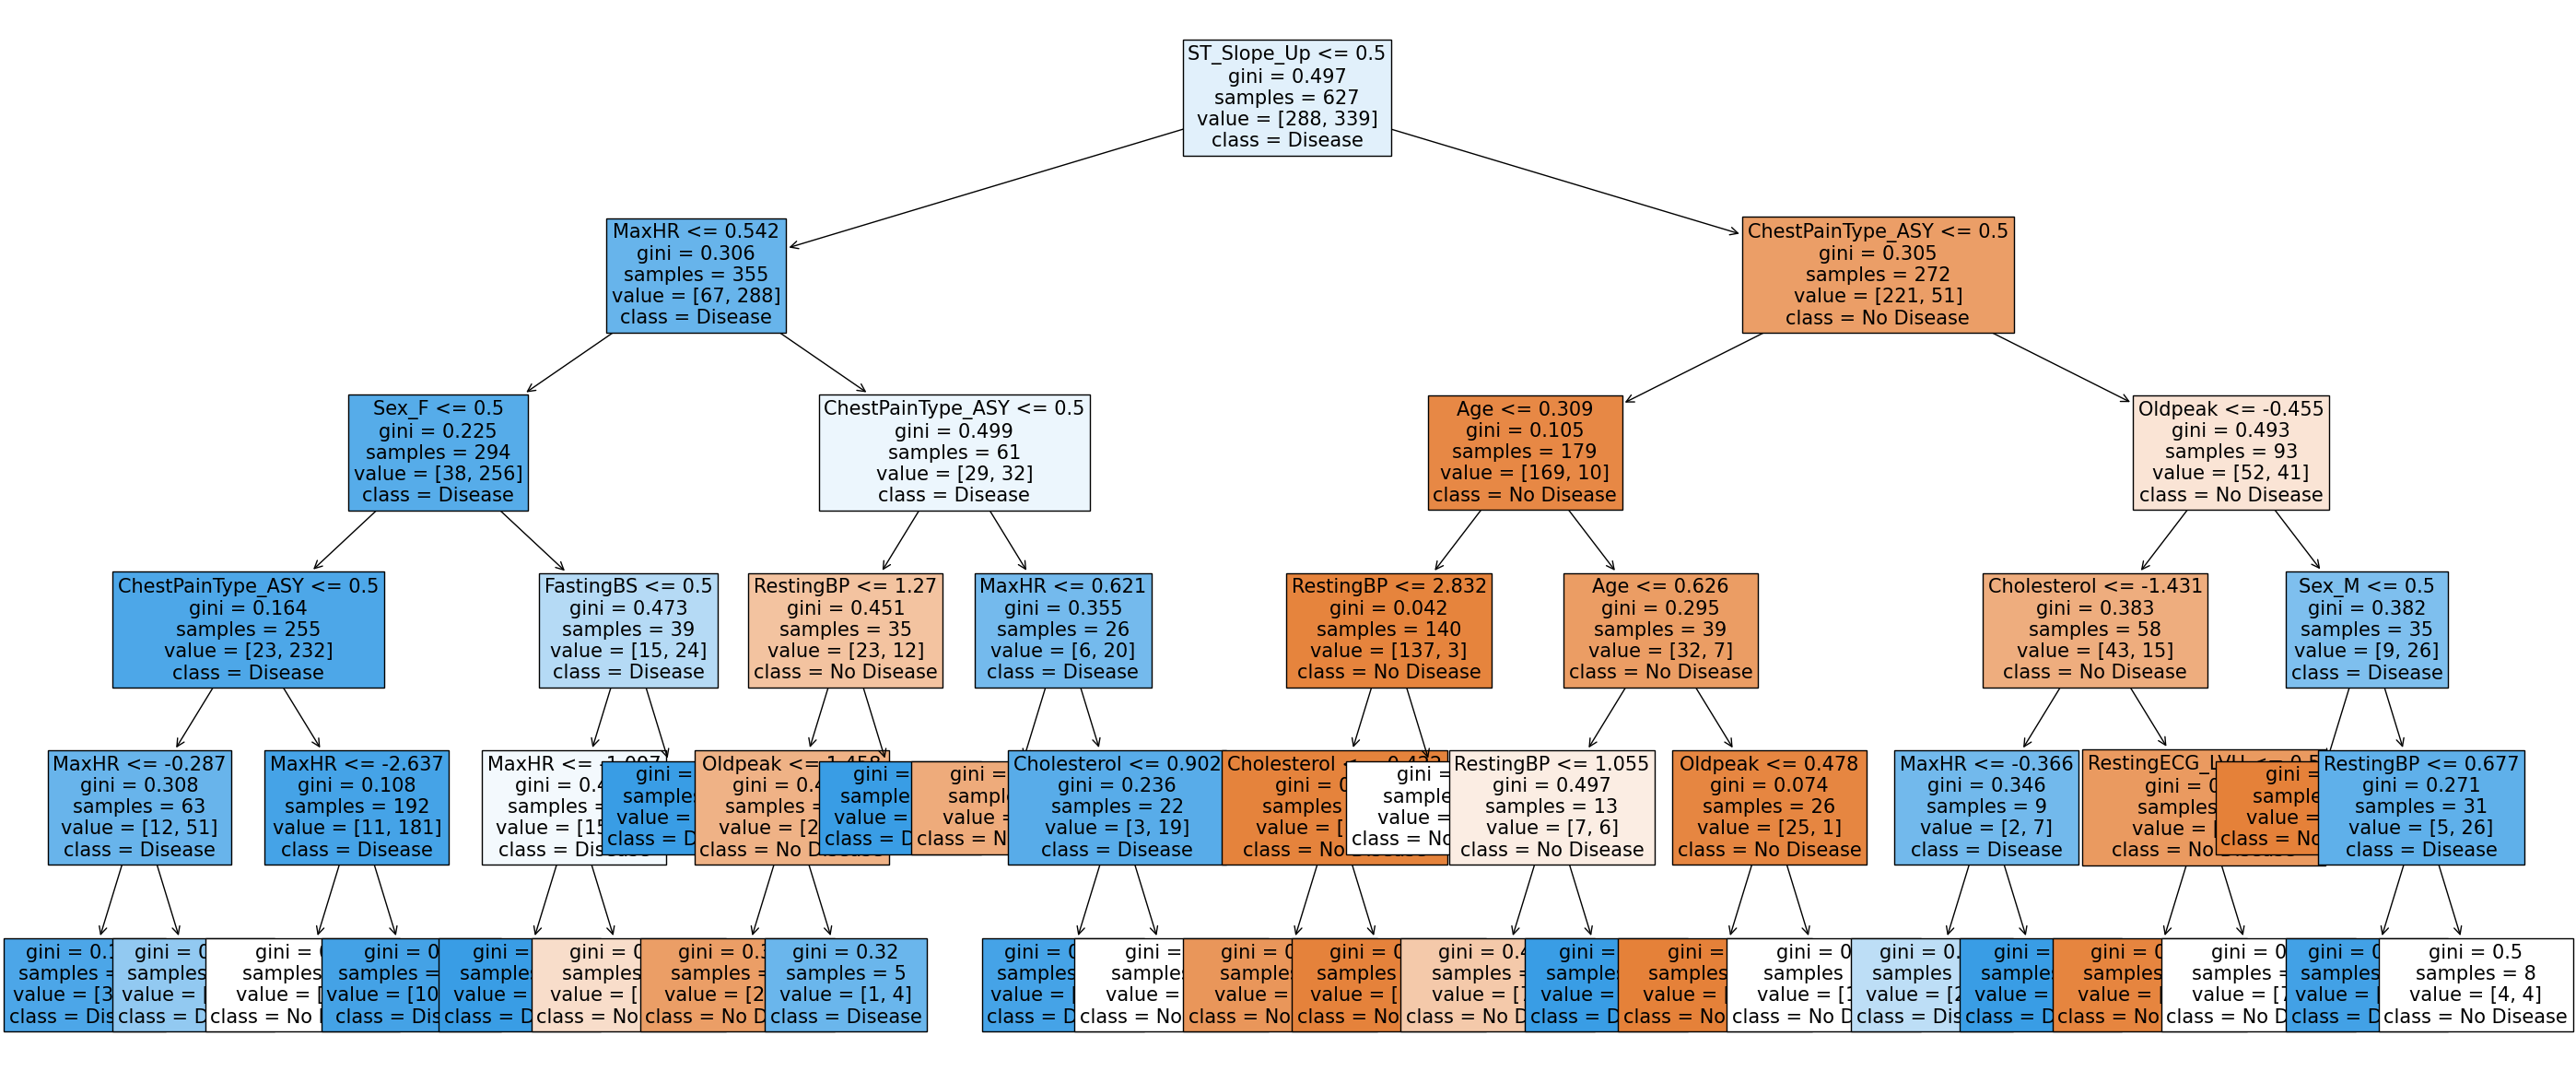

In [54]:
from sklearn import tree #https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

# show the tree of decision tree model
fig = plt.figure(figsize=(35, 15))
_ = tree.plot_tree(
    final_model_decision,
    feature_names=x_train.columns,
    fontsize=15,
    class_names=['No Disease', 'Disease'], #No Disease(no heart disease)
    filled=True
)
plt.show() # shows the decision tree that make decision based on which feature


# Model Comparison and Evaluation

In [48]:
# comparison between logister regression and decision tree

# logistic
y_pred_logistic = final_model_logistic.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# decision tree
y_pred_tree = final_model_decision.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# show
print("Logistic Regression Metrics on Test Data:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-Score:", f1_logistic)

print("\nDecision Tree Metrics on Test Data:")
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1-Score:", f1_tree)


Logistic Regression Metrics on Test Data:
Accuracy: 0.8814814814814815
Precision: 0.9044585987261147
Recall: 0.8930817610062893
F1-Score: 0.8987341772151899

Decision Tree Metrics on Test Data:
Accuracy: 0.8148148148148148
Precision: 0.8811188811188811
Recall: 0.7924528301886793
F1-Score: 0.8344370860927153


In [49]:
# The logistic regression model has higher accuracy, precision, recall, and F1-score compared to the decision tree model. Therefore, based on these metrics, the logistic regression model is the better-performing model for predicting heart failure disease.

# Final model: logistic model
y_pred = final_model_logistic.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Final Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Final Model Evaluation Metrics:
Accuracy: 0.8815
Precision: 0.9045
Recall: 0.8931
F1-Score: 0.8987


In [50]:
# perform cross validation https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

# split data into 5
scores = cross_val_score(final_model_logistic, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", scores)

Cross-validated Accuracy: [0.84126984 0.86507937 0.848      0.872      0.832     ]
